In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Different_stores_dataset.csv')
df.head(5)

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall
0,I138884,10/30/2016 9:58,C241288,Female,28,Clothing,5,1500.40,1425.380,Credit Card,South,Kentucky,Kanyon
1,I317333,10/30/2016 9:58,C111565,Male,21,Shoes,3,1800.51,1620.459,Debit Card,South,Kentucky,Viaport Outlet
2,I127801,10/30/2016 9:58,C266599,Male,20,Clothing,1,300.08,295.060,Cash,West,California,Metrocity
3,I173702,10/30/2016 9:58,C988172,Female,66,Shoes,5,3000.85,2900.765,Credit Card,South,Florida,Metropol AVM
4,I337046,10/30/2016 9:59,C189076,Female,53,Books,4,60.60,45.450,Cash,South,Florida,Kanyon


## 1. Check missing values and duplicate records

In [3]:
#for missing values
print (df.isnull().sum())

invoice_no                0
invoice_date              0
customer_id               0
gender                    0
age                       0
category                  0
quantity                  0
selling_price_per_unit    0
cost_price_per_unit       0
payment_method            0
region                    0
state                     0
shopping_mall             0
dtype: int64


In [4]:
#For checking duplicates
print (df.duplicated())

0        False
1        False
2        False
3        False
4        False
         ...  
99452    False
99453    False
99454    False
99455    False
99456    False
Length: 99457, dtype: bool


In [5]:
df[df.duplicated()]

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall


In [6]:
print (f' Number of duplicated rows: {df[df.duplicated()]}')

 Number of duplicated rows: Empty DataFrame
Columns: [invoice_no, invoice_date, customer_id, gender, age, category, quantity, selling_price_per_unit, cost_price_per_unit, payment_method, region, state, shopping_mall]
Index: []


## 2. Add column name 'Total Sales'

In [7]:
# df['Total Sales'] = np.nan
df['Total Sales'] = df['quantity']*df['selling_price_per_unit']
df.head()

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall,Total Sales
0,I138884,10/30/2016 9:58,C241288,Female,28,Clothing,5,1500.40,1425.380,Credit Card,South,Kentucky,Kanyon,7502.00
1,I317333,10/30/2016 9:58,C111565,Male,21,Shoes,3,1800.51,1620.459,Debit Card,South,Kentucky,Viaport Outlet,5401.53
2,I127801,10/30/2016 9:58,C266599,Male,20,Clothing,1,300.08,295.060,Cash,West,California,Metrocity,300.08
3,I173702,10/30/2016 9:58,C988172,Female,66,Shoes,5,3000.85,2900.765,Credit Card,South,Florida,Metropol AVM,15004.25
4,I337046,10/30/2016 9:59,C189076,Female,53,Books,4,60.60,45.450,Cash,South,Florida,Kanyon,242.40


### 3. How many customers have age more than 60?

In [8]:
#to check data type of age column
df['age'].dtypes

dtype('int64')

In [9]:
df['age'].value_counts()

age
37    2057
22    2051
64    2002
43    2000
51    1993
30    1981
24    1977
40    1960
48    1955
36    1954
38    1954
28    1953
27    1950
39    1947
21    1947
61    1945
52    1945
19    1936
56    1916
33    1913
46    1911
62    1909
44    1904
53    1903
67    1901
69    1901
23    1897
26    1896
68    1893
42    1892
41    1892
32    1891
63    1886
29    1885
49    1883
34    1883
47    1880
57    1879
66    1876
45    1876
58    1875
59    1874
60    1874
50    1873
31    1866
25    1863
65    1856
18    1844
20    1844
55    1843
35    1841
54    1830
Name: count, dtype: int64

In [10]:
#define a function which sum age equal to and above 60
def sum_sixty(age):
    count = 0
    if age>=60:
        count += 1
    return count

In [11]:
#apply the sum function to the 'age' column
customers_sixty_above = df['age'].apply(sum_sixty).sum()

In [12]:
#printing the age values
print(f' Customers with age 60 and above : {customers_sixty_above}')

 Customers with age 60 and above : 19043


### 4. How many unique customer_id entries are there? Do any customers make multiple purchases?

In [13]:
#to check unique customer_id's
df['customer_id'].unique()

array(['C241288', 'C111565', 'C266599', ..., 'C103292', 'C800631',
       'C273973'], dtype=object)

In [14]:
#to check for duplicates
df['customer_id'].duplicated().sum()

0

#### since there is no duplicate customer id's, so there is no multiple purchases from any customer

### 5. Are there more male or female customers, Show in Pie Chart?

In [15]:
df.head(10)

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall,Total Sales
0,I138884,10/30/2016 9:58,C241288,Female,28,Clothing,5,1500.40,1425.380,Credit Card,South,Kentucky,Kanyon,7502.00
1,I317333,10/30/2016 9:58,C111565,Male,21,Shoes,3,1800.51,1620.459,Debit Card,South,Kentucky,Viaport Outlet,5401.53
2,I127801,10/30/2016 9:58,C266599,Male,20,Clothing,1,300.08,295.060,Cash,West,California,Metrocity,300.08
3,I173702,10/30/2016 9:58,C988172,Female,66,Shoes,5,3000.85,2900.765,Credit Card,South,Florida,Metropol AVM,15004.25
4,I337046,10/30/2016 9:59,C189076,Female,53,Books,4,60.60,45.450,Cash,South,Florida,Kanyon,242.40
5,I227836,10/30/2016 9:59,C657758,Female,28,Clothing,5,1500.40,1475.380,Credit Card,West,Oregon,Viaport Outlet,7502.00
6,I121056,10/30/2016 9:59,C151197,Female,49,Cosmetics,1,40.66,35.462,Cash,West,California,Istinye Park,40.66
7,I293112,10/30/2016 9:59,C176086,Female,32,Clothing,2,600.16,450.120,Credit Card,West,California,Mall of Istanbul,1200.32
8,I293455,10/30/2016 10:00,C159642,Male,69,Clothing,3,900.24,675.180,Credit Card,West,California,Metrocity,2700.72
9,I326945,10/30/2016 10:00,C283361,Female,60,Clothing,2,600.16,450.120,Credit Card,West,California,Kanyon,1200.32


In [16]:
#to check for any spell error 
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [17]:
#for checking gender i.e. male and female
df['gender'].value_counts()

gender
Female    59482
Male      39975
Name: count, dtype: int64

In [18]:
59482-39975

19507

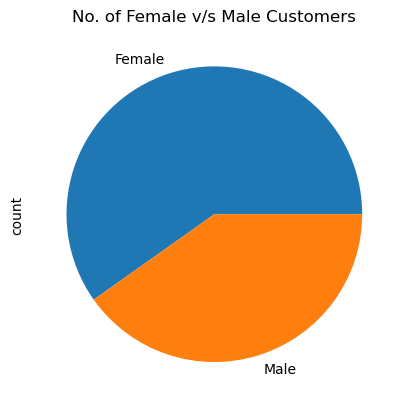

In [19]:
#ploting a pie chart on gender column
df['gender'].value_counts().plot(kind='pie')
plt.title('No. of Female v/s Male Customers')
plt.show()

#### Answer: There are 19507 more Female customers than Male Customers

### 6. Which category is least popular among customers?

In [20]:
df['category'].value_counts()

category
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: count, dtype: int64

#### 6. Answer: Least popular category is Books 

### 7. Which category has the highest sales volume?

In [21]:
df.head(5)

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall,Total Sales
0,I138884,10/30/2016 9:58,C241288,Female,28,Clothing,5,1500.40,1425.380,Credit Card,South,Kentucky,Kanyon,7502.00
1,I317333,10/30/2016 9:58,C111565,Male,21,Shoes,3,1800.51,1620.459,Debit Card,South,Kentucky,Viaport Outlet,5401.53
2,I127801,10/30/2016 9:58,C266599,Male,20,Clothing,1,300.08,295.060,Cash,West,California,Metrocity,300.08
3,I173702,10/30/2016 9:58,C988172,Female,66,Shoes,5,3000.85,2900.765,Credit Card,South,Florida,Metropol AVM,15004.25
4,I337046,10/30/2016 9:59,C189076,Female,53,Books,4,60.60,45.450,Cash,South,Florida,Kanyon,242.40


In [22]:
df['quantity'].describe()

count    99457.000000
mean         3.004424
std          1.415237
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         15.000000
Name: quantity, dtype: float64

In [23]:
# Highest sales valume 
df['quantity'].max()

15

In [24]:
# Find the row with the maximum quantity
df.loc[df['quantity'].idxmax()]

invoice_no                         I283443
invoice_date              10/30/2016 10:21
customer_id                        C189493
gender                                Male
age                                     43
category                        Technology
quantity                                15
selling_price_per_unit              3150.0
cost_price_per_unit                 2677.5
payment_method                 Credit Card
region                             Central
state                             Illinois
shopping_mall               Viaport Outlet
Total Sales                        47250.0
Name: 100, dtype: object

In [25]:
# Find the row with the maximum quantity
max_sales_row = df.loc[df['quantity'].idxmax()]
max_sales_row

invoice_no                         I283443
invoice_date              10/30/2016 10:21
customer_id                        C189493
gender                                Male
age                                     43
category                        Technology
quantity                                15
selling_price_per_unit              3150.0
cost_price_per_unit                 2677.5
payment_method                 Credit Card
region                             Central
state                             Illinois
shopping_mall               Viaport Outlet
Total Sales                        47250.0
Name: 100, dtype: object

In [26]:
max_sales_cat = max_sales_row['category']
max_sales_cat

'Technology'

#### 7. Answer: maximum sales volume category is 'Technology'

### 8. Add column name 'Total Profit'

In [27]:
df['Total Cost'] = df['quantity']*df['cost_price_per_unit']
df['Total Profit'] = df['Total Sales'] - df['Total Cost']
df.head(5)

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall,Total Sales,Total Cost,Total Profit
0,I138884,10/30/2016 9:58,C241288,Female,28,Clothing,5,1500.40,1425.380,Credit Card,South,Kentucky,Kanyon,7502.00,7126.900,375.100
1,I317333,10/30/2016 9:58,C111565,Male,21,Shoes,3,1800.51,1620.459,Debit Card,South,Kentucky,Viaport Outlet,5401.53,4861.377,540.153
2,I127801,10/30/2016 9:58,C266599,Male,20,Clothing,1,300.08,295.060,Cash,West,California,Metrocity,300.08,295.060,5.020
3,I173702,10/30/2016 9:58,C988172,Female,66,Shoes,5,3000.85,2900.765,Credit Card,South,Florida,Metropol AVM,15004.25,14503.825,500.425
4,I337046,10/30/2016 9:59,C189076,Female,53,Books,4,60.60,45.450,Cash,South,Florida,Kanyon,242.40,181.800,60.600


### 9. Display the top 10 invoices with the highest quantities sold?

In [28]:
df =df.sort_values(by = 'quantity' , ascending = False)
df

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall,Total Sales,Total Cost,Total Profit
100,I283443,10/30/2016 10:21,C189493,Male,43,Technology,15,3150.00,2677.500,Credit Card,Central,Illinois,Viaport Outlet,47250.00,40162.500,7087.500
275,I282789,10/30/2016 11:02,C172185,Female,67,Cosmetics,12,81.32,76.924,Cash,West,Idaho,Istinye Park,975.84,923.088,52.752
109,I293215,10/30/2016 10:23,C166635,Male,18,Cosmetics,12,162.64,130.112,Credit Card,Central,Illinois,Istinye Park,1951.68,1561.344,390.336
305,I115679,10/30/2016 11:09,C266462,Male,27,Clothing,11,300.08,285.060,Cash,Central,Michigan,Kanyon,3300.88,3135.660,165.220
129,I160221,10/30/2016 10:28,C319231,Male,25,Clothing,10,900.24,675.180,Cash,West,Oregon,Mall of Istanbul,9002.40,6751.800,2250.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7674,I932546,10/31/2016 15:48,C113714,Female,58,Cosmetics,1,40.66,28.462,Cash,East,Massachusetts,Mall of Istanbul,40.66,28.462,12.198
61282,I242198,11/9/2016 8:17,C360798,Male,21,Clothing,1,300.08,225.060,Cash,West,Washington,Istinye Park,300.08,225.060,75.020
61281,I984455,11/9/2016 8:17,C156272,Female,65,Food & Beverage,1,5.23,3.661,Cash,West,Washington,Viaport Outlet,5.23,3.661,1.569
61275,I222275,11/9/2016 8:15,C327598,Male,55,Food & Beverage,1,5.23,3.661,Debit Card,West,California,Kanyon,5.23,3.661,1.569


In [29]:
#top 10 invoices with the highest quantities sold
df[['invoice_no','customer_id']].head(10)

,invoice_no,customer_id
100,I283443,C189493
275,I282789,C172185
109,I293215,C166635
305,I115679,C266462
129,I160221,C319231
61,I207205,C716161
224,I353272,C199311
201,I286193,C322994
145,I246375,C236365
11,I139207,C191708


### 10. Which payment method is most commonly used?

In [30]:
df['payment_method'].value_counts()

payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: count, dtype: int64

#### 10. Answer: Cash payment mehtod is most commonly used in sales data

### 11. Total Sales with respect to region?

In [31]:
df.head()

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall,Total Sales,Total Cost,Total Profit
100,I283443,10/30/2016 10:21,C189493,Male,43,Technology,15,3150.00,2677.500,Credit Card,Central,Illinois,Viaport Outlet,47250.00,40162.500,7087.500
275,I282789,10/30/2016 11:02,C172185,Female,67,Cosmetics,12,81.32,76.924,Cash,West,Idaho,Istinye Park,975.84,923.088,52.752
109,I293215,10/30/2016 10:23,C166635,Male,18,Cosmetics,12,162.64,130.112,Credit Card,Central,Illinois,Istinye Park,1951.68,1561.344,390.336
305,I115679,10/30/2016 11:09,C266462,Male,27,Clothing,11,300.08,285.060,Cash,Central,Michigan,Kanyon,3300.88,3135.660,165.220
129,I160221,10/30/2016 10:28,C319231,Male,25,Clothing,10,900.24,675.180,Cash,West,Oregon,Mall of Istanbul,9002.40,6751.800,2250.600


In [32]:
df.groupby('region')['Total Sales'].sum()

region
Central    58803471.74
East       72280660.57
South      40655491.64
West       79825624.03
Name: Total Sales, dtype: float64

### 12. Sort Malls with average sales higher to lower?

In [33]:
df.head()

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall,Total Sales,Total Cost,Total Profit
100,I283443,10/30/2016 10:21,C189493,Male,43,Technology,15,3150.00,2677.500,Credit Card,Central,Illinois,Viaport Outlet,47250.00,40162.500,7087.500
275,I282789,10/30/2016 11:02,C172185,Female,67,Cosmetics,12,81.32,76.924,Cash,West,Idaho,Istinye Park,975.84,923.088,52.752
109,I293215,10/30/2016 10:23,C166635,Male,18,Cosmetics,12,162.64,130.112,Credit Card,Central,Illinois,Istinye Park,1951.68,1561.344,390.336
305,I115679,10/30/2016 11:09,C266462,Male,27,Clothing,11,300.08,285.060,Cash,Central,Michigan,Kanyon,3300.88,3135.660,165.220
129,I160221,10/30/2016 10:28,C319231,Male,25,Clothing,10,900.24,675.180,Cash,West,Oregon,Mall of Istanbul,9002.40,6751.800,2250.600


In [34]:
# df_sort_mall = df.sort_values(by = 'Total Sales', ascending = False)
#df[['shopping_mall','Total Sales']].sort_values(by = 'Total Sales', ascending = False)

In [35]:
#to check unique and spell mistakes in shopping mall column
df['shopping_mall'].unique()

array(['Viaport Outlet', 'Istinye Park', 'Kanyon', 'Mall of Istanbul',
       'Zorlu Center', 'Metropol AVM', 'Metrocity'], dtype=object)

In [36]:
#malls with avg sales (high to low)
df.groupby('shopping_mall')['Total Sales'].mean().sort_values( ascending = False)

shopping_mall
Zorlu Center        2573.248351
Kanyon              2550.618396
Mall of Istanbul    2543.276766
Viaport Outlet      2523.835118
Istinye Park        2523.186677
Metropol AVM        2497.777108
Metrocity           2485.030133
Name: Total Sales, dtype: float64

### 13. Sort categories with the highest profit margins, display in bar plot?

In [37]:
#adding a new column Profit margin
df['Profit margin'] = (df['Total Sales']/df['Total Profit'])*100
df = df.round(2)
df.head()

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall,Total Sales,Total Cost,Total Profit,Profit margin
100,I283443,10/30/2016 10:21,C189493,Male,43,Technology,15,3150.00,2677.50,Credit Card,Central,Illinois,Viaport Outlet,47250.00,40162.50,7087.50,666.67
275,I282789,10/30/2016 11:02,C172185,Female,67,Cosmetics,12,81.32,76.92,Cash,West,Idaho,Istinye Park,975.84,923.09,52.75,1849.86
109,I293215,10/30/2016 10:23,C166635,Male,18,Cosmetics,12,162.64,130.11,Credit Card,Central,Illinois,Istinye Park,1951.68,1561.34,390.34,500.00
305,I115679,10/30/2016 11:09,C266462,Male,27,Clothing,11,300.08,285.06,Cash,Central,Michigan,Kanyon,3300.88,3135.66,165.22,1997.87
129,I160221,10/30/2016 10:28,C319231,Male,25,Clothing,10,900.24,675.18,Cash,West,Oregon,Mall of Istanbul,9002.40,6751.80,2250.60,400.00


In [38]:
#sorting the categories with respect to profit margin(highest to low)
df.groupby('category')['Profit margin'].sum().sort_values( ascending = False)

category
Clothing           35862683.41
Shoes              10891598.30
Cosmetics           6255317.09
Food & Beverage     5318164.56
Technology          4659670.03
Toys                4164324.96
Books               1826837.28
Souvenir            1792955.70
Name: Profit margin, dtype: float64

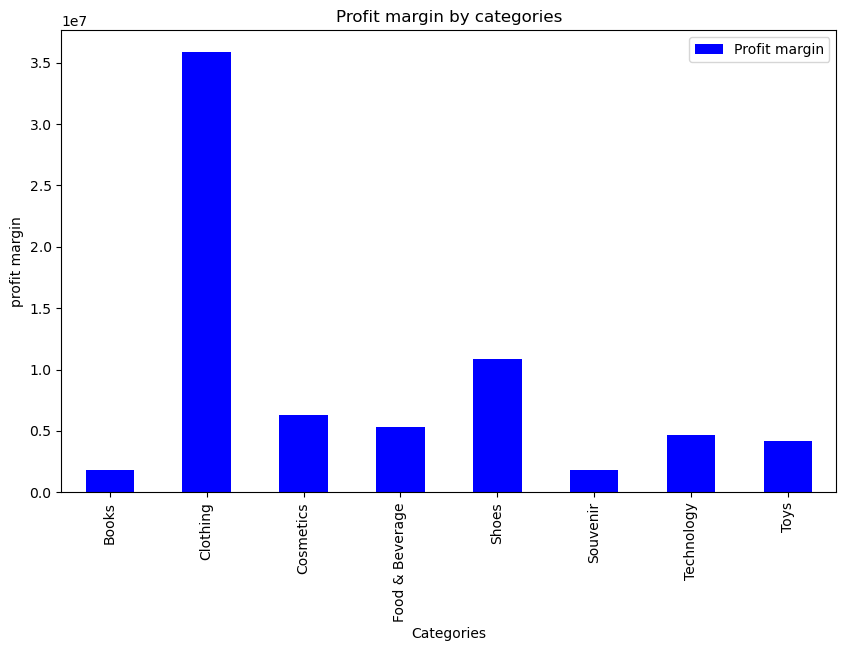

In [39]:
#diplay bar plot on sorted categories by profit margin
df.groupby('category')['Profit margin'].sum().plot(kind='bar', figsize=(10, 6), color='blue')
plt.title('Profit margin by categories')
plt.xlabel('Categories')
plt.ylabel('profit margin')
plt.legend()
plt.show()

### 14. What is the total number of transactions per region for each payment method?

In [40]:
df.head()

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall,Total Sales,Total Cost,Total Profit,Profit margin
100,I283443,10/30/2016 10:21,C189493,Male,43,Technology,15,3150.00,2677.50,Credit Card,Central,Illinois,Viaport Outlet,47250.00,40162.50,7087.50,666.67
275,I282789,10/30/2016 11:02,C172185,Female,67,Cosmetics,12,81.32,76.92,Cash,West,Idaho,Istinye Park,975.84,923.09,52.75,1849.86
109,I293215,10/30/2016 10:23,C166635,Male,18,Cosmetics,12,162.64,130.11,Credit Card,Central,Illinois,Istinye Park,1951.68,1561.34,390.34,500.00
305,I115679,10/30/2016 11:09,C266462,Male,27,Clothing,11,300.08,285.06,Cash,Central,Michigan,Kanyon,3300.88,3135.66,165.22,1997.87
129,I160221,10/30/2016 10:28,C319231,Male,25,Clothing,10,900.24,675.18,Cash,West,Oregon,Mall of Istanbul,9002.40,6751.80,2250.60,400.00


In [55]:
#to count total no. of transaction per region 
df.groupby('region')['payment_method'].count()

region
Central    23099
East       28306
South      16209
West       31843
Name: payment_method, dtype: int64

In [58]:
#to count total no. of transaction per region per payment method

df.groupby('region')['payment_method'].value_counts()

region   payment_method
Central  Cash              10319
         Credit Card        8140
         Debit Card         4640
East     Cash              12738
         Credit Card        9817
         Debit Card         5751
South    Cash               7227
         Credit Card        5698
         Debit Card         3284
West     Cash              14163
         Credit Card       11276
         Debit Card         6404
Name: count, dtype: int64

### 15. How do sales in different categories compare between males and females?

In [59]:
df.head()

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall,Total Sales,Total Cost,Total Profit,Profit margin
100,I283443,10/30/2016 10:21,C189493,Male,43,Technology,15,3150.00,2677.50,Credit Card,Central,Illinois,Viaport Outlet,47250.00,40162.50,7087.50,666.67
275,I282789,10/30/2016 11:02,C172185,Female,67,Cosmetics,12,81.32,76.92,Cash,West,Idaho,Istinye Park,975.84,923.09,52.75,1849.86
109,I293215,10/30/2016 10:23,C166635,Male,18,Cosmetics,12,162.64,130.11,Credit Card,Central,Illinois,Istinye Park,1951.68,1561.34,390.34,500.00
305,I115679,10/30/2016 11:09,C266462,Male,27,Clothing,11,300.08,285.06,Cash,Central,Michigan,Kanyon,3300.88,3135.66,165.22,1997.87
129,I160221,10/30/2016 10:28,C319231,Male,25,Clothing,10,900.24,675.18,Cash,West,Oregon,Mall of Istanbul,9002.40,6751.80,2250.60,400.00


In [65]:
#to compare sales in different categories b/w male and female
df.groupby('gender')['category'].value_counts()

gender  category       
Female  Clothing           20652
        Cosmetics           9070
        Food & Beverage     8804
        Toys                6085
        Shoes               5967
        Souvenir            3017
        Technology          2981
        Books               2906
Male    Clothing           13835
        Cosmetics           6027
        Food & Beverage     5972
        Shoes               4067
        Toys                4002
        Books               2075
        Technology          2015
        Souvenir            1982
Name: count, dtype: int64

In [ ]:
# plt.figure(figsize = (13,6))
# plt.pie(x = values2, labels = None, autopct = '%1.1f%%', shadow = True)
# plt.legend(labels = labels_for_company, loc = 'upper right')
# plt.axis('equal')
# plt.title("Compant Size")
# plt.show()

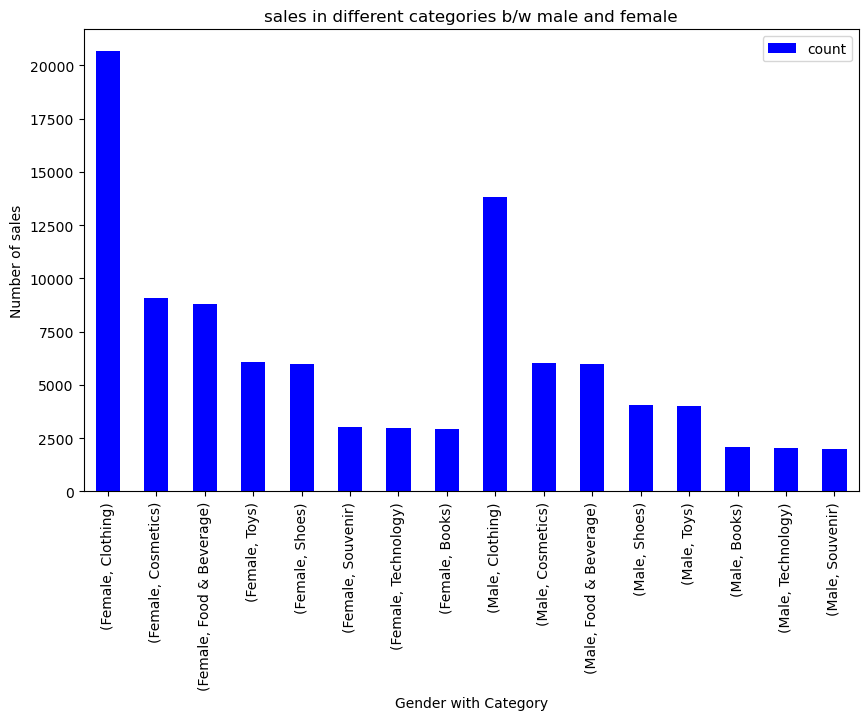

In [69]:
#to compare sales in different categories b/w male and female
df.groupby('gender')['category'].value_counts().plot(kind='bar', figsize=(10, 6), color='blue')
plt.title('sales in different categories b/w male and female')
plt.xlabel('Gender with Category')
plt.ylabel('Number of sales')
plt.legend()
plt.show()

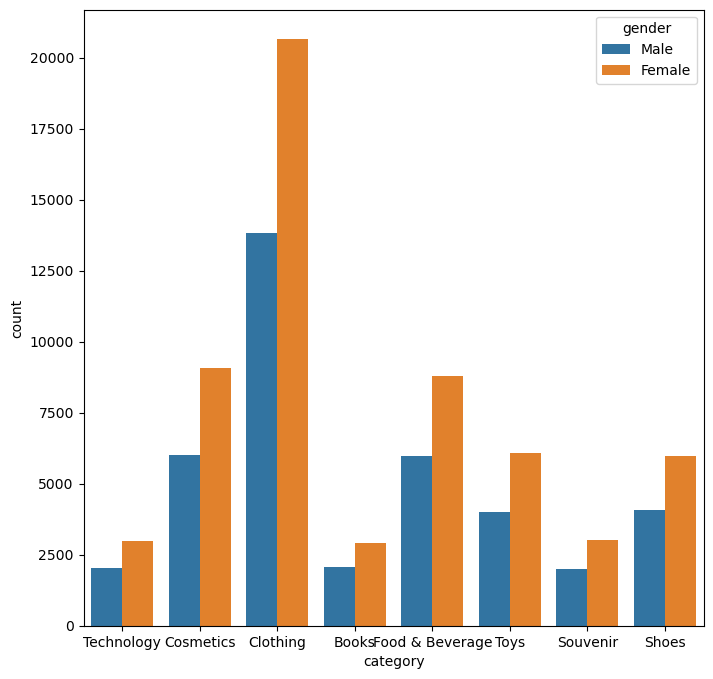

In [75]:
#visualization using count plot
plt.figure(figsize=(8,8))
sns.countplot(x="category", hue="gender", data=df)
plt.show()